# Problem Statement
Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients is growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

Individuals with diabetes face a risk of developing some secondary health issues such as heart diseases and nerve damage. Thus, early detection and treatment of diabetes can prevent complications and assist in reducing the risk of severe health problems. Even though it's incurable, it can be managed by treatment and medication.

Researchers at the Bio-Solutions lab want to get a better understanding of this disease among women and are planning to use machine learning models that will help them to identify patients who are at risk of diabetes.

You as a data scientist at Bio-Solutions have to build a classification model using a dataset collected by the "National Institute of Diabetes and Digestive and Kidney Diseases" consisting of several attributes that would help to identify whether a person is at risk of diabetes or not.

# Objective:
To build a model to predict whether an individual is at risk of diabetes or not.

# Data Description:
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skinfold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- Pedigree: Diabetes pedigree function - A function that scores likelihood of diabetes based on family history.
- Age: Age in years
- Class: Class variable (0: the person is not diabetic or 1: the person is diabetic)

# Libraries

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Library to split data 
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Load in Data 

In [2]:
pima=pd.read_csv("pima-indians-diabetes.csv")

In [3]:
# Make copy of data to keep original data 
data = pima.copy() 

# Initial Inspection of Data 

In [4]:
# first few rows
data.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Last few rows
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# Understand the data 

In [6]:
# shape of dataset
data.shape

(768, 9)

There are 9 columns with 768 rows 

In [7]:
# Dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Class          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- Total 9 numeric columns (7, int64, 2 float64)
- No missing values
- Small dataset size 


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Insight 
Overall 
    - No missing values

Pregnancy 
   - Average women have 4 pregnancies 
   - Max is 17 which will be further analysis 

Glucose 
   - mean with 120
   - std of 31
   - max is 199 
   -  min is 0 will be futher analysis
 
BloodPressure 
   - Mean is 69 
   - std of 19 
   - max is 122
   - min is 0 will be futher analysis
   
SkinThickness
   - Mean is 20 
   - std of 15
   - Max is 99
   - min and 25% input is 0 needs further analysis\
   
Insulin 
   - mean is 79 
   - std of 115
   - max is 846 needs to be analyzed  
   - min and 25% input is 0 needs further analysis 
   
Age
   - Mean age is 33
   - std of 11
   - Max age is 81, min of 21 
   
   


In [9]:
data.duplicated().sum()

0

-------------------------------------------------------------------------------

# EDA 

Order of univariate analysis 

- Pregnancies      
- Glucose         
- BloodPressure   
- SkinThickness    
- Insulin         
- BMI            
- Pedigree       
- Age            
- Class       

## Functions for EDA

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

--------------------------------------------------------------------------------

# Observation on pregnancy

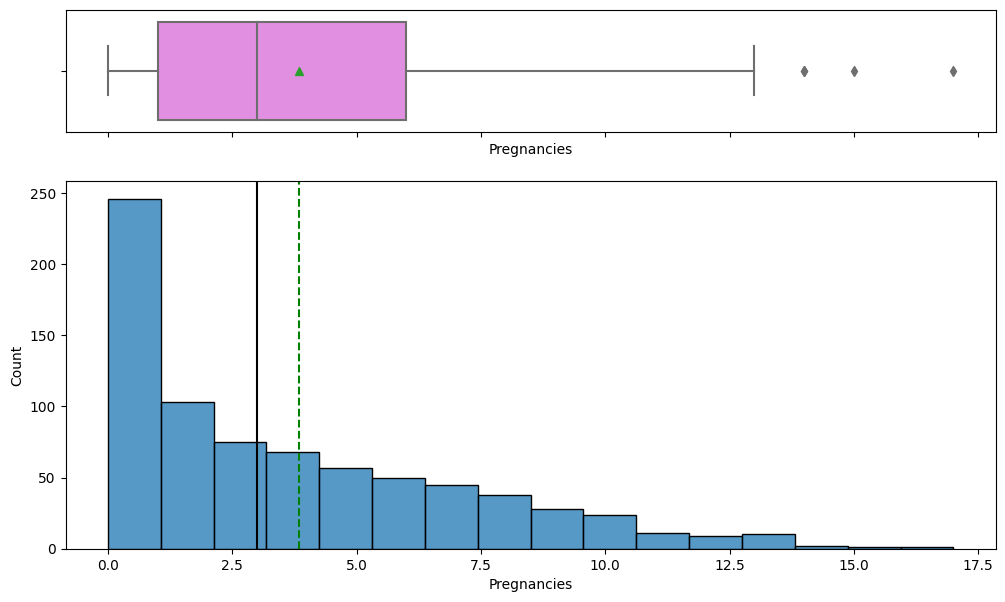

In [11]:
# Observation on pregnancy 
histogram_boxplot(data, "Pregnancies")

### Insight

- Right-skewed 
- Few outliers on upper right side (needs further analysis)
- Majority have less than 3 pregnancies
- Higher the pregnancies the fewer the count  

# Observation on Glucose 

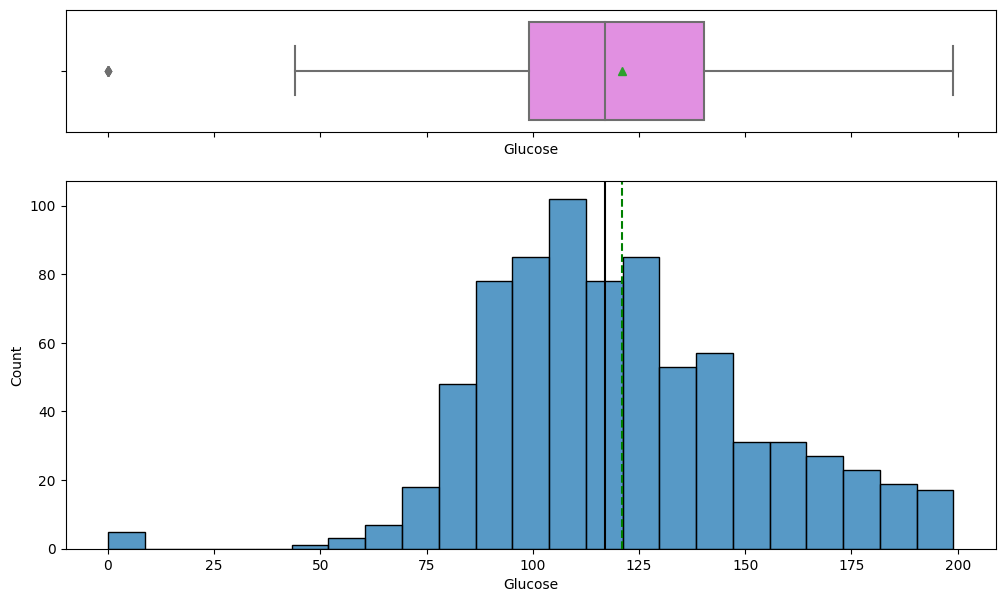

In [12]:
# Observation on Glucose
histogram_boxplot(data, 'Glucose')

### Insight
- Fairly normal distribution 
- Boxplot shows there is a 0 value, needs further analysis 
- 75% is equal to 140, meaning 75% of woman have less than 140 units of plama glucose concentration 
- Max is near 200
- 10 to 40 shows no counts 

### Observation on Blood Pressure

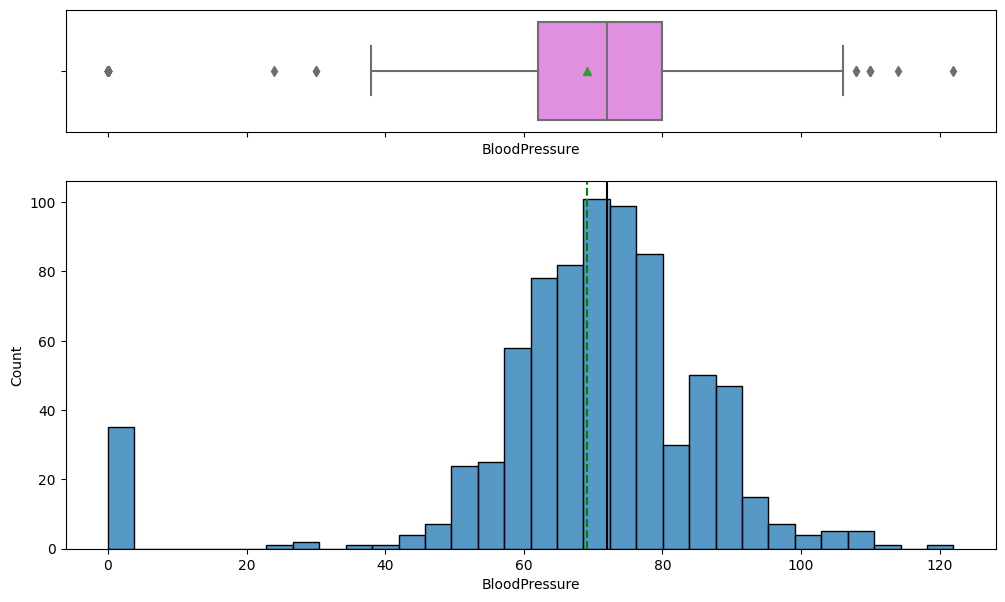

In [13]:
# Observation on Blood pressure 
histogram_boxplot(data,"BloodPressure")

# Insight 
- Fairly normal distribution except for a few outliers, most women have normal blood pressure within in this dataset  
- 0 values present needs further analysis 
- 75% of woman have less than 80 mmHg of blood pressure 
- Higher end of blood pressure is over 120

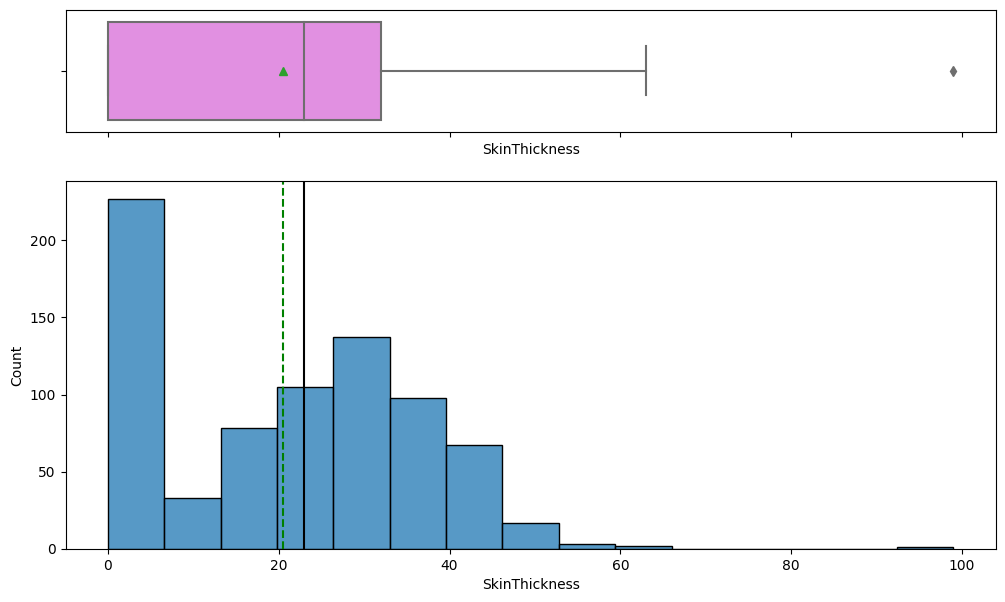

In [15]:
### Observation on Skin thickness
histogram_boxplot(data,"SkinThickness")

# Insight 
- one outlier present on upper side 
- 75% of woman have skin thickness of 32 or less
- 0 value present, needs further analysis 

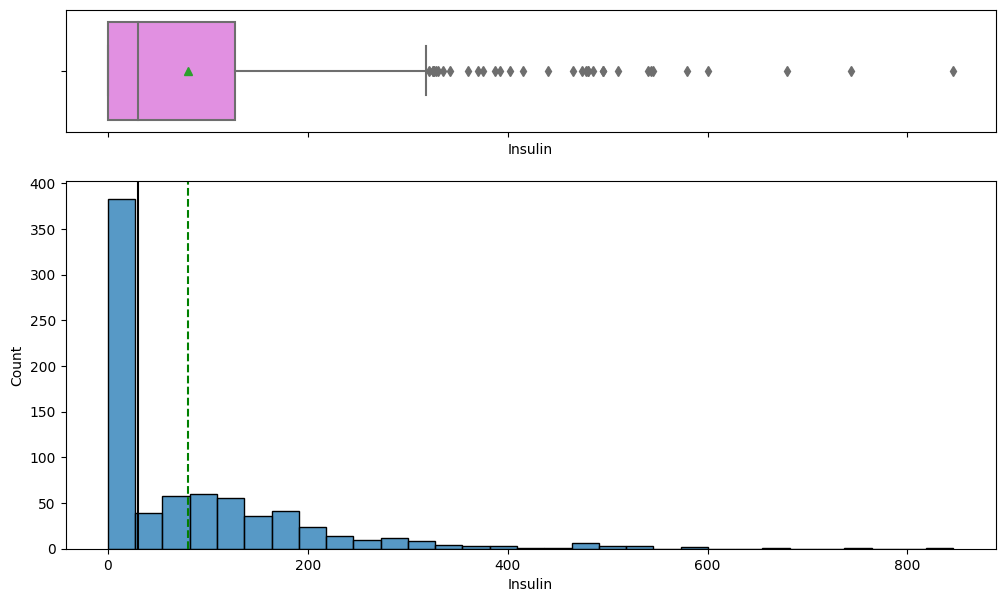

In [16]:
histogram_boxplot(data,"Insulin")

# Insight
- Many outliers present on upper ride side
- Many 0 values appear, needs further analysis 
- Right-skewed data 
- 75% of women have less than 127 mu U/ml of insulin concentration
- Max is over 800 